<style>
body {
    max-width: 900px;
    margin: 40px auto;
    padding: 0 20px;
    font-family: "Georgia", serif;
    line-height: 1.6;
}
</style>

<div style="text-align: center; padding: 60px 60px">
  <h1 style="font-weight: bold; font-size: 3.1em">
    GA-UFLP-1
  </h1>
</div>

## **CONFIGURACIÓN DE LA NOTEBOOK**

In [1]:
import pandas as pd
import os

In [2]:
from cargar_datos import *
from ga2 import *

# **CARGAR DATOS**

In [3]:
file_name = 'UFLP-10'

In [4]:
n_instalaciones, n_clientes, costos_fijos, costos_de_transporte = cargar_datos('datos/'+file_name+'.txt')

# **BÚSQUEDA DE HIPERPARÁMETROS**

# **BÚSQUEDA DE MUTACIÓN**

In [ ]:
random_seed = [0, 1, 2, 3, 4, 5, 6, 7, 8]
fitness_objetivo = 257896

path = "resultados"
os.makedirs(os.path.join(path, file_name), exist_ok=True)

In [6]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .2,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .4,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .6,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": .8,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 300,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
]

## **EJECUCIÓN**

In [22]:
def ejecucion(configuraciones=configuraciones, random_seed=random_seed, fitness_objetivo=fitness_objetivo):
    resultados = {}

    for config in configuraciones:
        nombre_configuracion = f"N={config['tamaño_de_poblacion']}, M={config['tasa_de_mutacion']}, C={config['tasa_de_crossover']}, T={config['tamaño_del_torneo']}, G={config['maximo_de_generaciones']}, tc={config['tipo_de_crossover']}, tm={config['tipo_de_mutacion']}"
        print(f"--- Ejecutando configuracion: {nombre_configuracion} ---")
        resultados[nombre_configuracion] = []

        for ejecucion in range(len(random_seed)):
            ga = UFLP_GA(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte,
                        config["tamaño_de_poblacion"], config["tasa_de_mutacion"], config["tasa_de_crossover"],
                        config["tamaño_del_torneo"], config["maximo_de_generaciones"], config["tipo_de_crossover"],
                        config["tipo_de_mutacion"], random_seed[ejecucion], fitness_objetivo)

            mejor_solucion, mejor_fitness, historial_de_fitnesses, tiempo_de_ejecucion, num_generaciones, generacion_opti = ga.run()
            resultados[nombre_configuracion].append({
                "mejor_solucion": mejor_solucion,
                "mejor_costo": mejor_fitness,
                "tiempo_de_ejecucion": tiempo_de_ejecucion,
                "num_generaciones": num_generaciones,
                "historial_de_fitnesses": historial_de_fitnesses,
                "generacion_optima": generacion_opti
            })
            print(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}")

            with open(os.path.join(path, file_name, f"{nombre_configuracion}.txt"), "a") as f:
                f.write(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}\n")
       
        print("\n")
        
    return resultados

In [8]:
resultados = ejecucion()

--- Ejecutando configuracion: N=100, M=0.2, C=0, T=10, G=300, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258149, Tiempo = 1.69557s, Generación Óptima = None
Seed 1: Mejor Costo = 258257, Tiempo = 0.57112s, Generación Óptima = None
Seed 2: Mejor Costo = 258505, Tiempo = 0.63539s, Generación Óptima = None
Seed 3: Mejor Costo = 258208, Tiempo = 0.61559s, Generación Óptima = None
Seed 4: Mejor Costo = 258285, Tiempo = 0.59069s, Generación Óptima = None
Seed 5: Mejor Costo = 258382, Tiempo = 0.66764s, Generación Óptima = None
Seed 6: Mejor Costo = 258055, Tiempo = 0.78394s, Generación Óptima = None
Seed 7: Mejor Costo = 258393, Tiempo = 0.73331s, Generación Óptima = None
Seed 8: Mejor Costo = 258431, Tiempo = 0.76591s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=0.4, C=0, T=10, G=300, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258234, Tiempo = 0.77931s, Generación Óptima = None
Seed 1: Mejor Costo = 258048, Tiempo = 0.69212s, Generación Óptima = None
Seed 2

## **RESUMEN**

In [23]:
def resumen(resultados=resultados, fitness_objetivo=fitness_objetivo, path=path, file_name=file_name):
    tablas_resumen = {}
    for nombre_configuracion, resultados_ejecuciones in resultados.items():
        costos = [res["mejor_costo"] for res in resultados_ejecuciones]
        tiempos = [res["tiempo_de_ejecucion"] for res in resultados_ejecuciones]
        mejor_costo = min(costos)
        mejor_costo_index = costos.index(mejor_costo)
        peor_costo = max(costos)
        costo_promedio = np.mean(costos)
        desviacion_estandar_costo = np.std(costos)
        tiempo_promedio = np.mean(tiempos)
        desviacion_porcentual = (peor_costo - mejor_costo) / mejor_costo * 100 if mejor_costo != 0 else np.inf
        error = mejor_costo - fitness_objetivo
        error_relativo = (mejor_costo - fitness_objetivo) / fitness_objetivo if fitness_objetivo != 0 else np.inf
        generacion_opitma_promedio = np.mean([res["generacion_optima"] for res in resultados_ejecuciones if res["generacion_optima"] is not None])

        tablas_resumen[nombre_configuracion] = pd.DataFrame({
            "Métrica": ["Costo Objetivo", "Mejor Costo", "Error", "Error Relativo", "Peor Costo", "Costo Promedio", "Desviacion Estándar Costo", "Tiempo Promedio de Ejecucion (s)", "Desviacion Porcentual (%)", "Generación Óptima Promedio", "Generación más Rápida", "Semilla"],
            "Valor": [f"{fitness_objetivo}", f"{mejor_costo}", f"{error:.0f}", f"{error_relativo:.6f}", f"{peor_costo:.0f}", f"{costo_promedio:.0f}", f"{desviacion_estandar_costo:.4f}", f"{tiempo_promedio:.6f}", f"{desviacion_porcentual:.6f}", f"{generacion_opitma_promedio:.2f}", f"{resultados_ejecuciones[mejor_costo_index]['num_generaciones']}", f"{random_seed[mejor_costo_index]}"]
        })

        os.makedirs(os.path.join(path, file_name, nombre_configuracion), exist_ok=True)

    for nombre_configuracion, resumen_df in tablas_resumen.items():
        resumen_df.to_csv(os.path.join(path, file_name, nombre_configuracion, f"resumen.csv"), index=False)

    return tablas_resumen


In [10]:
tablas_resumen = resumen()

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## **GRÁFICAS**

In [11]:
from graficas import *

In [12]:
curva_corvengencia_individual(resultados, path, file_name)
box_plot_costos(resultados, path, file_name)
guardar_resultados(resultados, path, file_name, random_seed)

Texto guardado en resultados\UFLP-10\N=100, M=0.2, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=0.4, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=0.6, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=0.8, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0, T=10, G=300, tc=un punto, tm=random\mejor-solucion.txt


## **COMPARACIÓN**

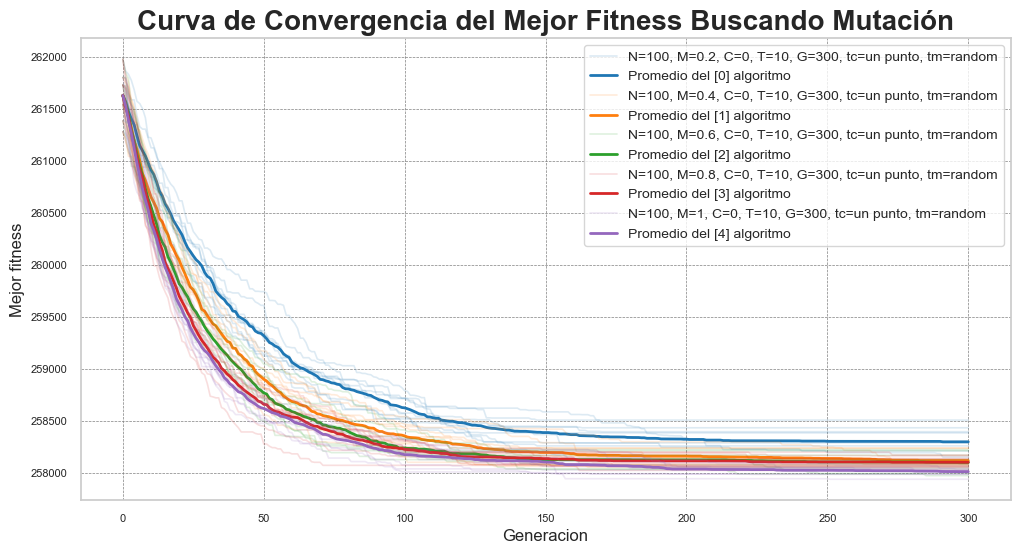

In [13]:
curva_convergencia_comparacion(resultados, path, file_name, show=True, alphaa=0.15, NOMBRE="Buscando Mutación")

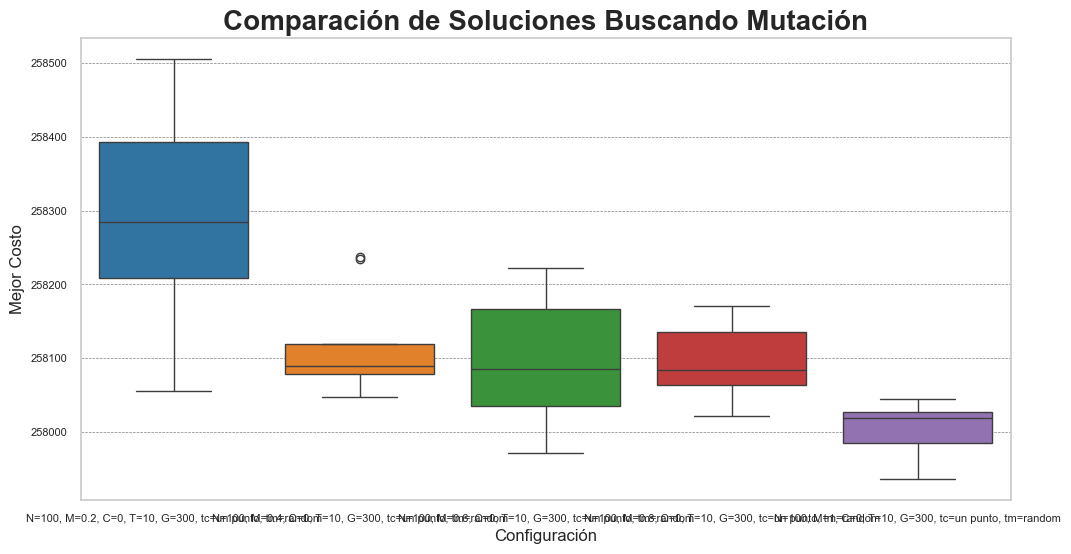

In [14]:
box_plot_costos_comparacion(resultados, path, file_name, show=True, NOMBRE="Buscando Mutación")

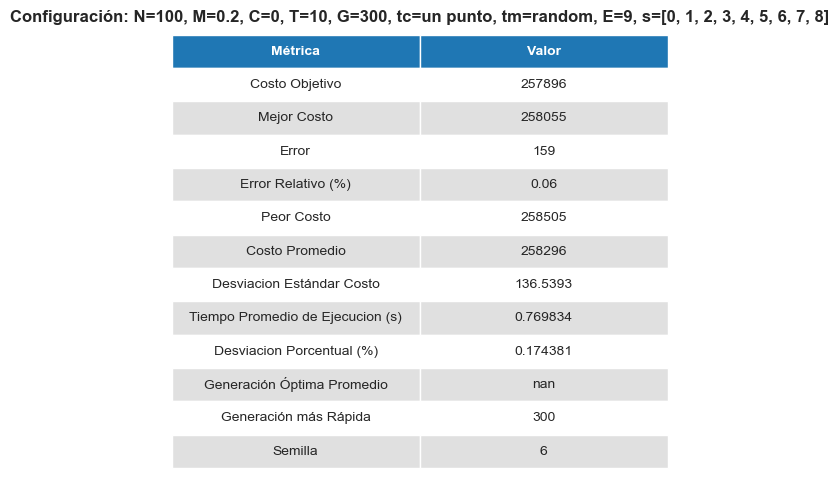

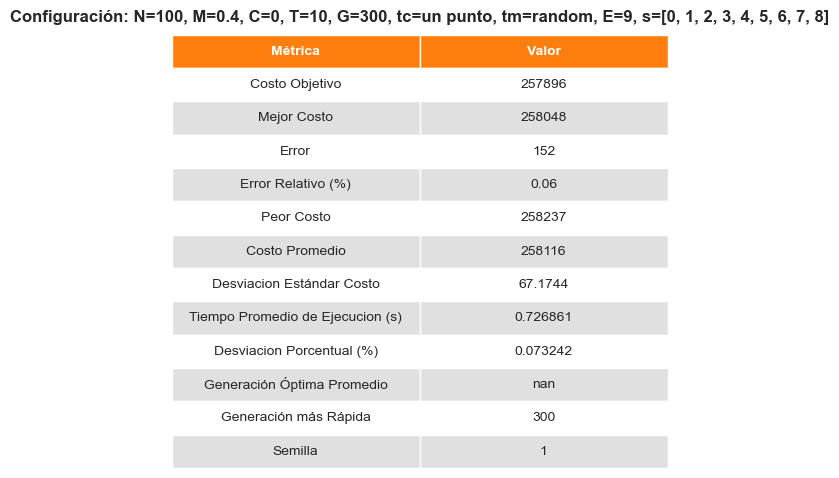

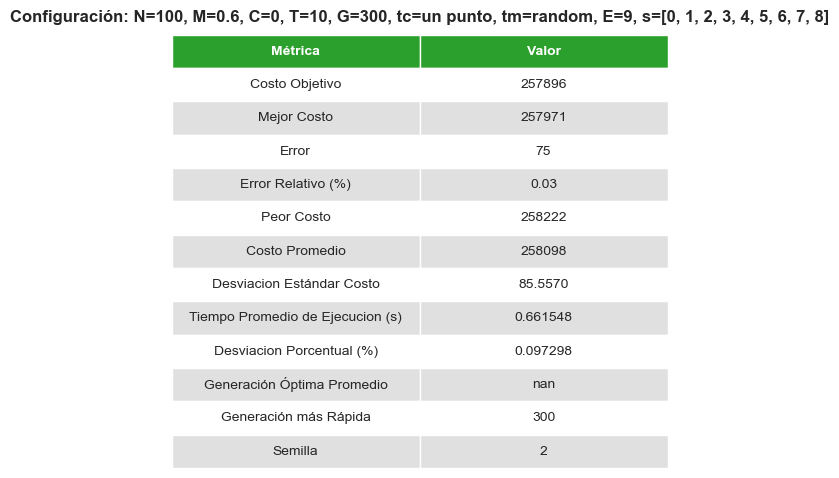

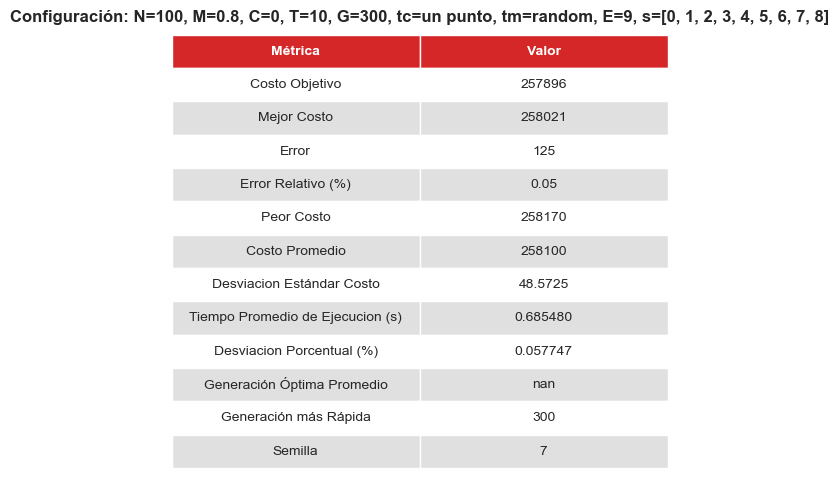

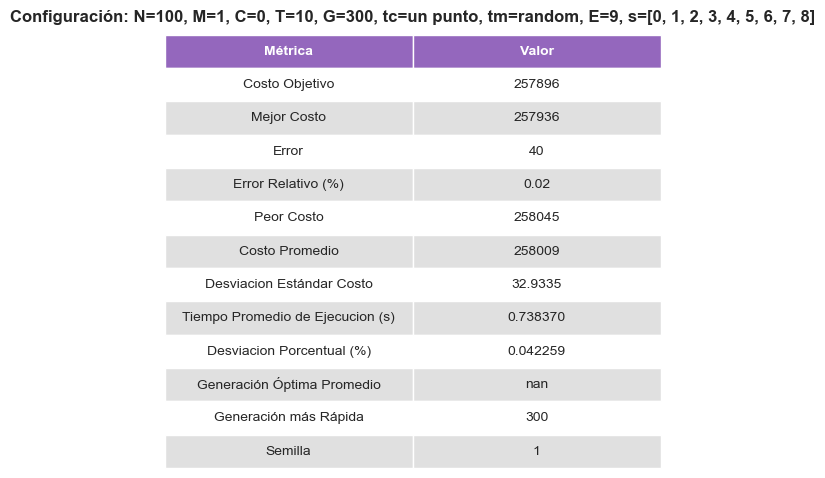

In [15]:
resumen_tablas(resultados, path, file_name, len(random_seed), tablas_resumen, random_seed, show=True, NOMBRE="Buscando Mutación")

# **BÚSQUEDA DE CROSSOVER**

In [16]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.2,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.4,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.6,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto", 
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 1,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

In [12]:
def todo(quebuscamos):
    resultados = ejecucion(configuraciones=configuraciones, random_seed=random_seed, fitness_objetivo=fitness_objetivo)
    tablas_resumen = resumen(resultados=resultados, fitness_objetivo=fitness_objetivo, path=path, file_name=file_name)
    curva_corvengencia_individual(resultados, path, file_name)
    box_plot_costos(resultados, path, file_name)
    guardar_resultados(resultados, path, file_name, random_seed)
    curva_convergencia_comparacion(resultados, path, file_name, show=True, alphaa=0.15, NOMBRE=quebuscamos)
    box_plot_costos_comparacion(resultados, path, file_name, show=True, NOMBRE=quebuscamos)
    resumen_tablas(resultados, path, file_name, len(random_seed), tablas_resumen, random_seed, show=True, NOMBRE=quebuscamos)

--- Ejecutando configuracion: N=100, M=1, C=0, T=10, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258993, Tiempo = 0.08196s, Generación Óptima = None
Seed 1: Mejor Costo = 259328, Tiempo = 0.08257s, Generación Óptima = None
Seed 2: Mejor Costo = 259019, Tiempo = 0.11115s, Generación Óptima = None
Seed 3: Mejor Costo = 259105, Tiempo = 0.06893s, Generación Óptima = None
Seed 4: Mejor Costo = 259224, Tiempo = 0.07148s, Generación Óptima = None
Seed 5: Mejor Costo = 259096, Tiempo = 0.07650s, Generación Óptima = None
Seed 6: Mejor Costo = 259054, Tiempo = 0.06887s, Generación Óptima = None
Seed 7: Mejor Costo = 259106, Tiempo = 0.08208s, Generación Óptima = None
Seed 8: Mejor Costo = 259429, Tiempo = 0.08337s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.2, T=10, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258915, Tiempo = 0.07766s, Generación Óptima = None
Seed 1: Mejor Costo = 259236, Tiempo = 0.08744s, Generación Óptima = None
Seed 2: Me

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Texto guardado en resultados\UFLP-10\N=100, M=1, C=0, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.2, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.4, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.6, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=1, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt


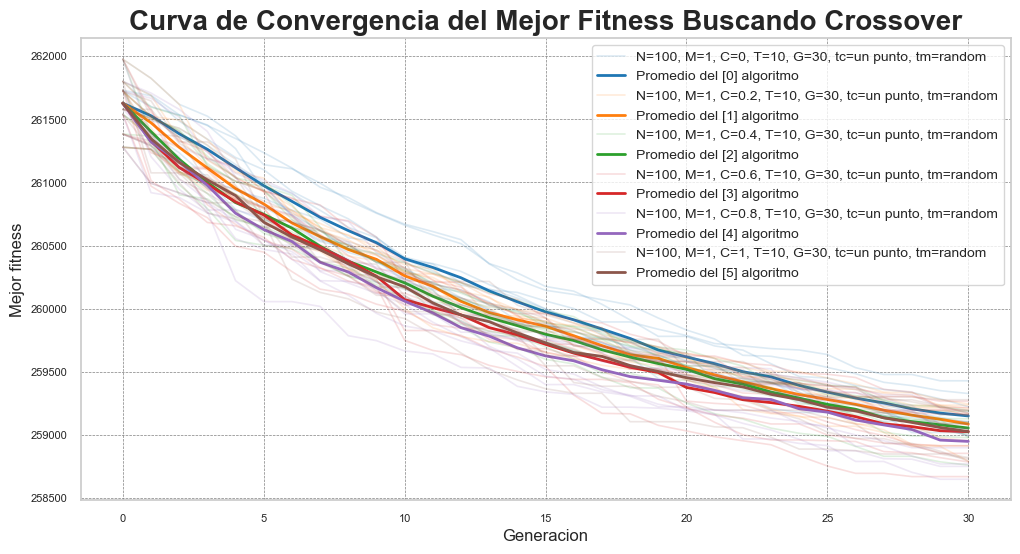

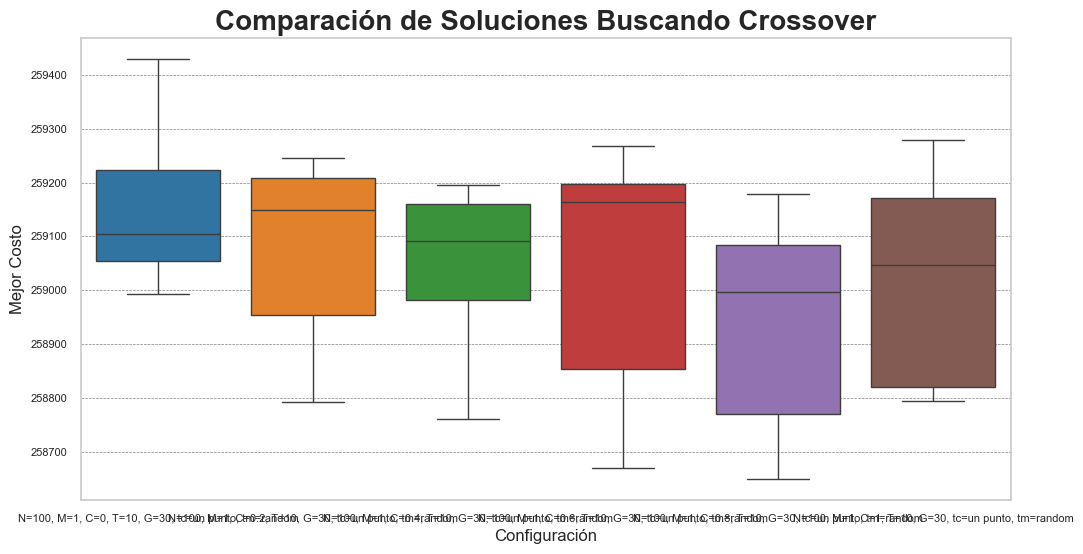

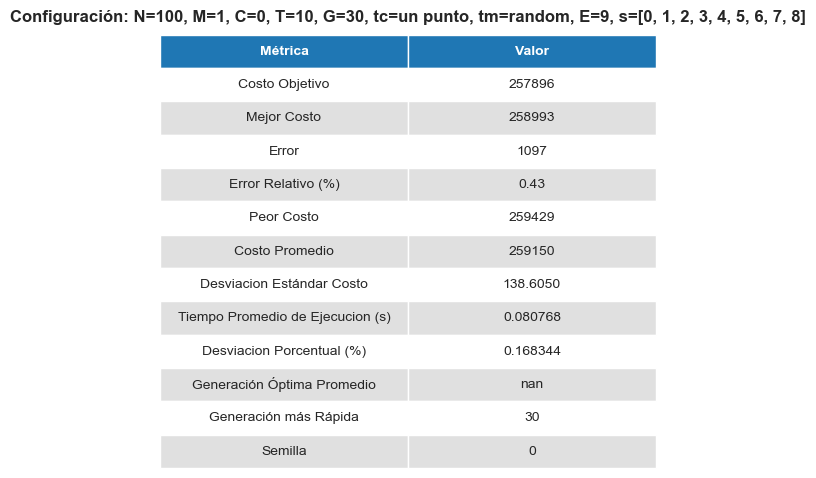

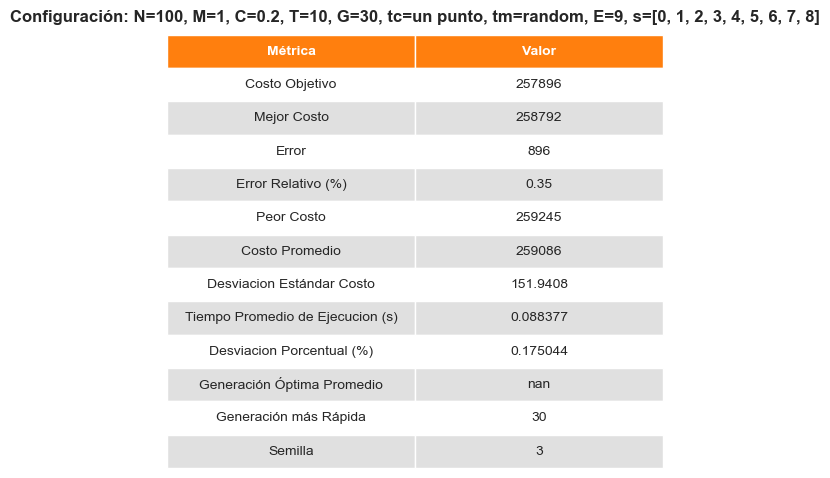

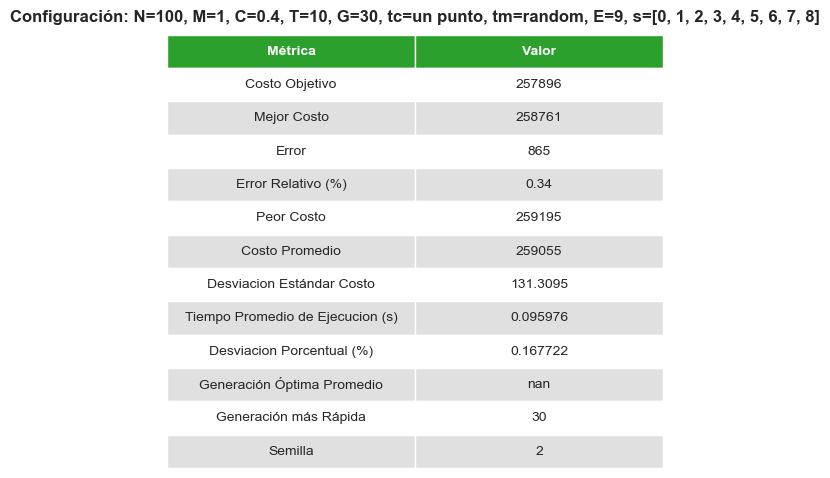

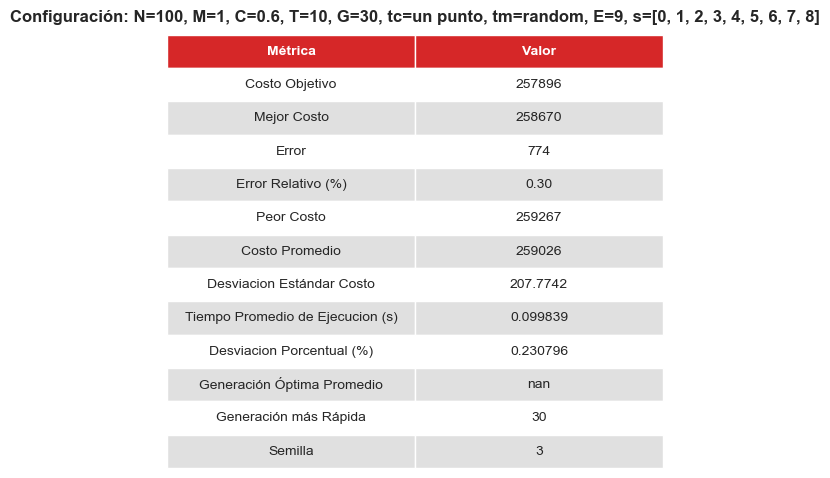

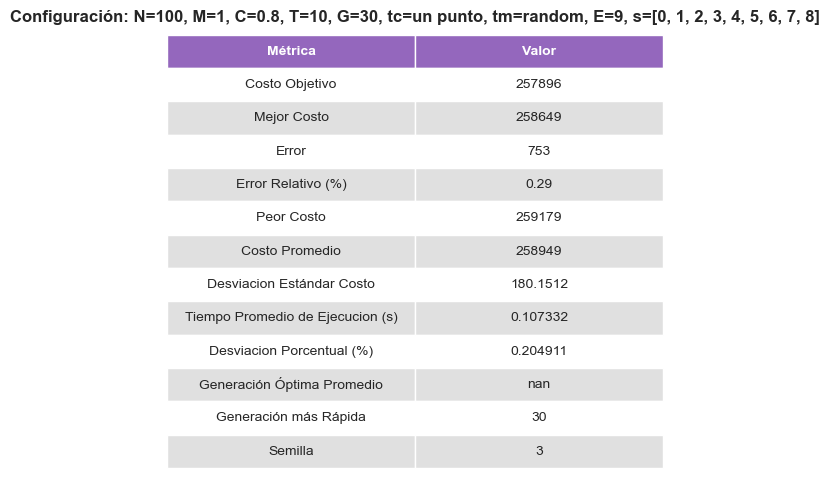

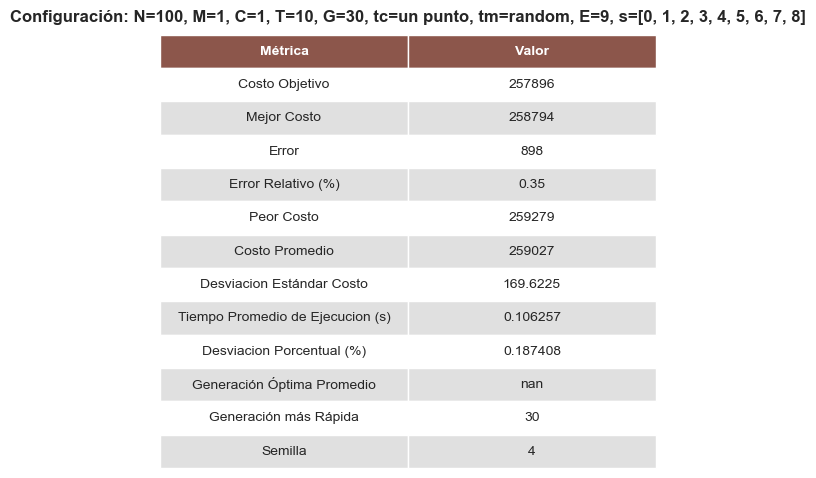

In [18]:
todo("Buscando Crossover")

# **BÚSQUEDA DE TORNEO**

In [20]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 2,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 10,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 20,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 30,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 50,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 60,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=2, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 260215, Tiempo = 0.09543s, Generación Óptima = None
Seed 1: Mejor Costo = 260307, Tiempo = 0.09703s, Generación Óptima = None
Seed 2: Mejor Costo = 260380, Tiempo = 0.09560s, Generación Óptima = None
Seed 3: Mejor Costo = 259764, Tiempo = 0.10199s, Generación Óptima = None
Seed 4: Mejor Costo = 259892, Tiempo = 0.11831s, Generación Óptima = None
Seed 5: Mejor Costo = 260113, Tiempo = 0.09014s, Generación Óptima = None
Seed 6: Mejor Costo = 260458, Tiempo = 0.09685s, Generación Óptima = None
Seed 7: Mejor Costo = 260379, Tiempo = 0.09690s, Generación Óptima = None
Seed 8: Mejor Costo = 259951, Tiempo = 0.09550s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=10, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 259159, Tiempo = 0.08820s, Generación Óptima = None
Seed 1: Mejor Costo = 259053, Tiempo = 0.09823s, Generación Óptima = None
Seed 2: M

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=2, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=10, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=20, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=30, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=50, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=60, G=30, tc=un punto, tm=random\mejor-solucion.txt


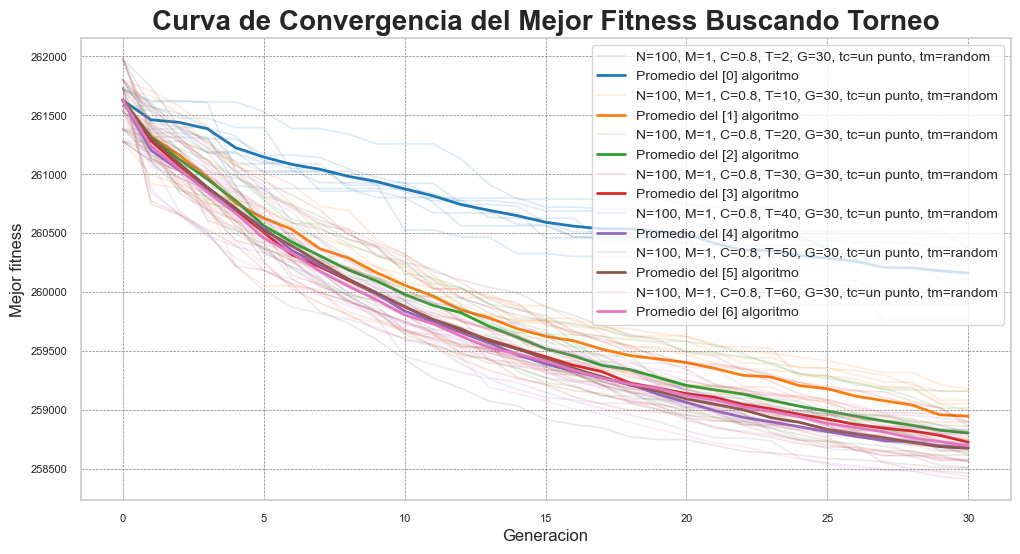

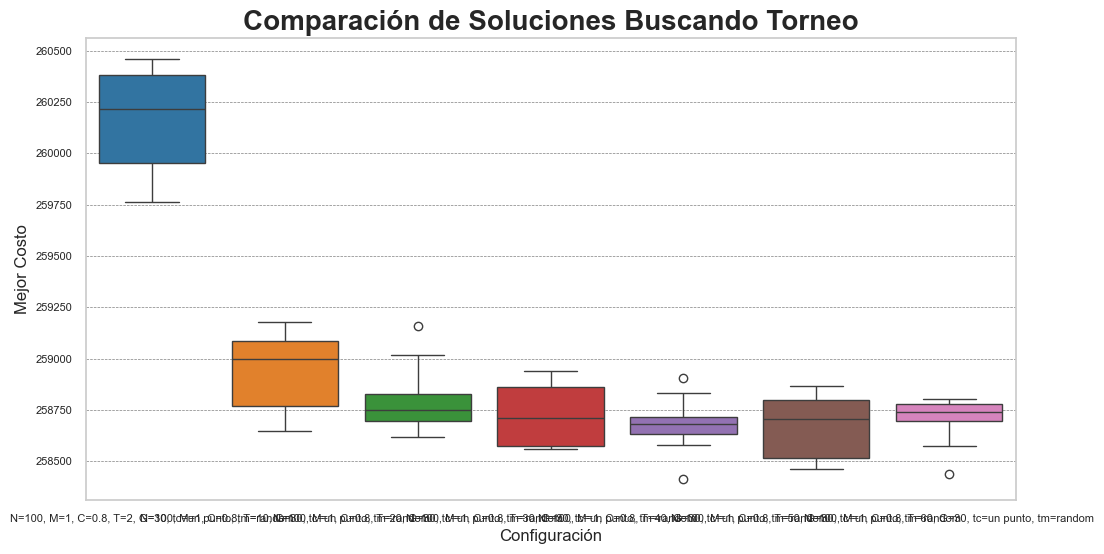

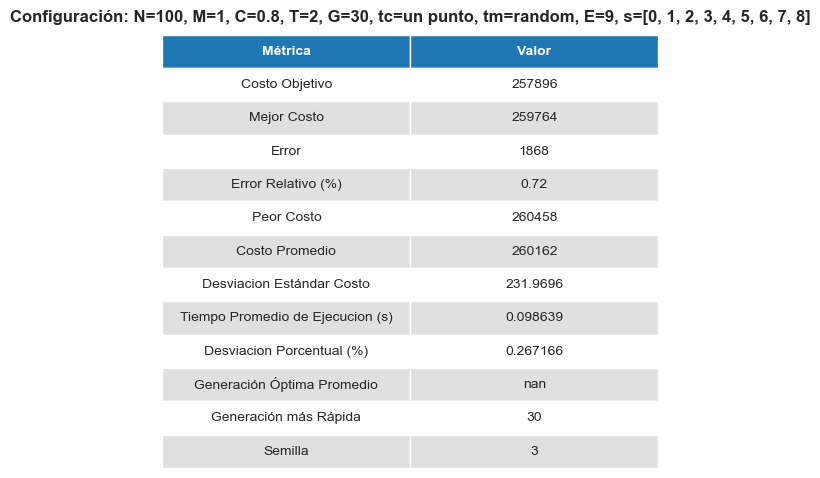

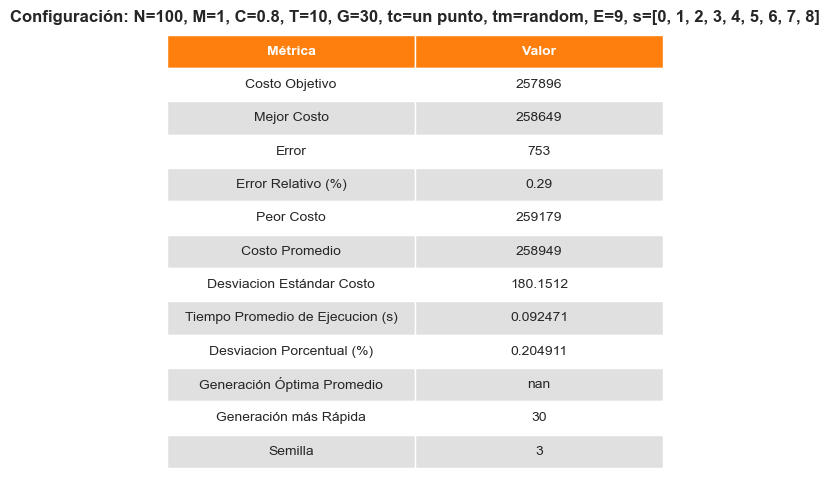

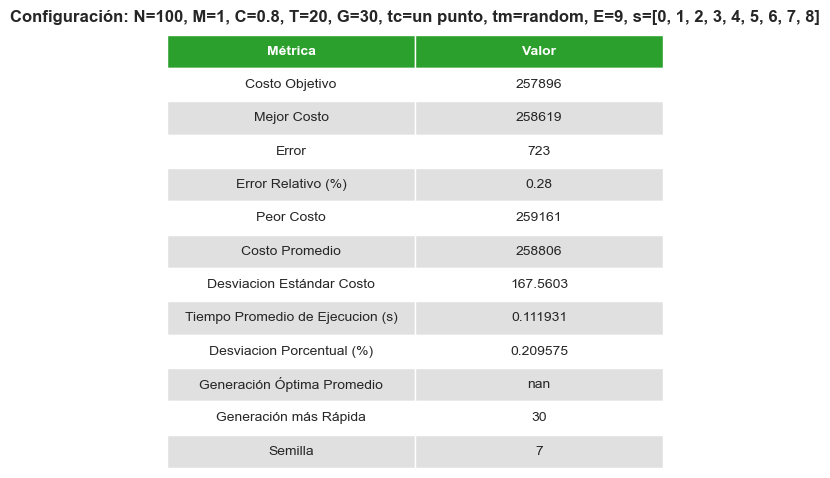

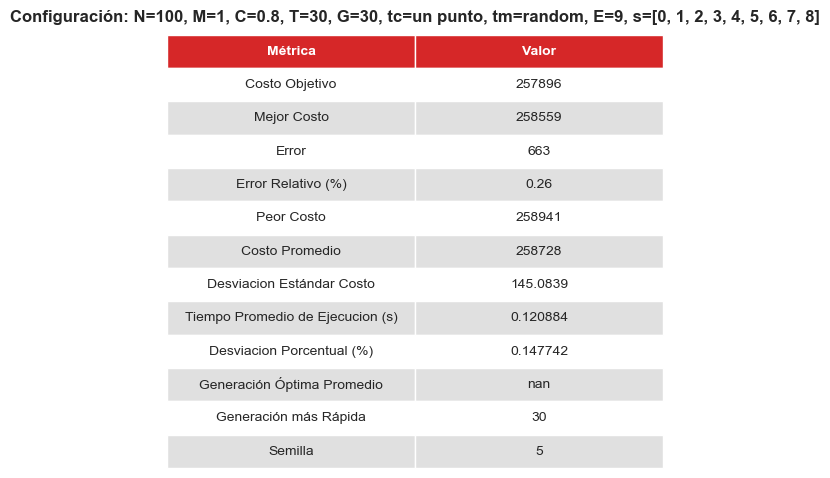

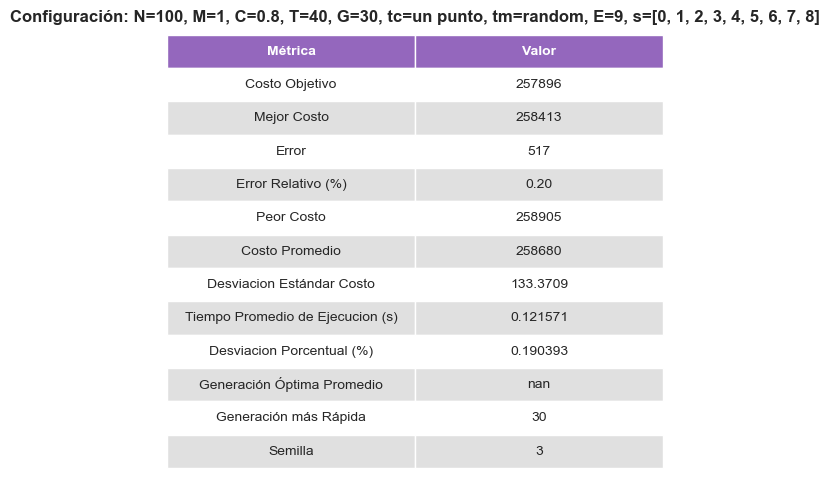

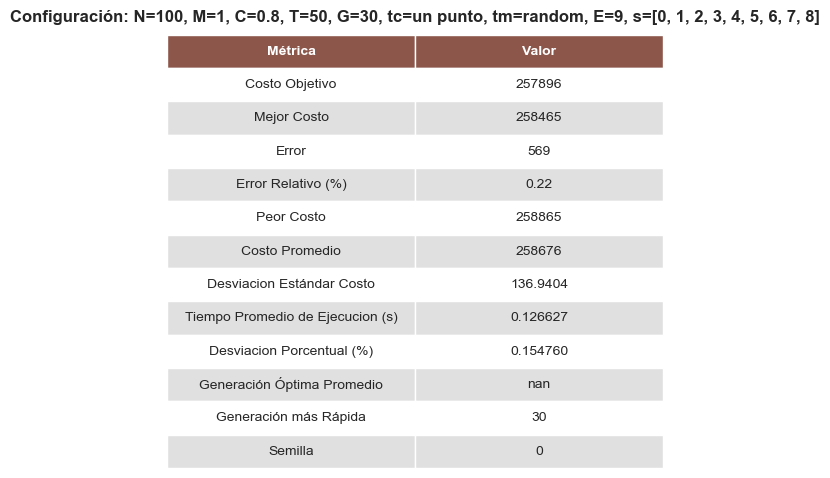

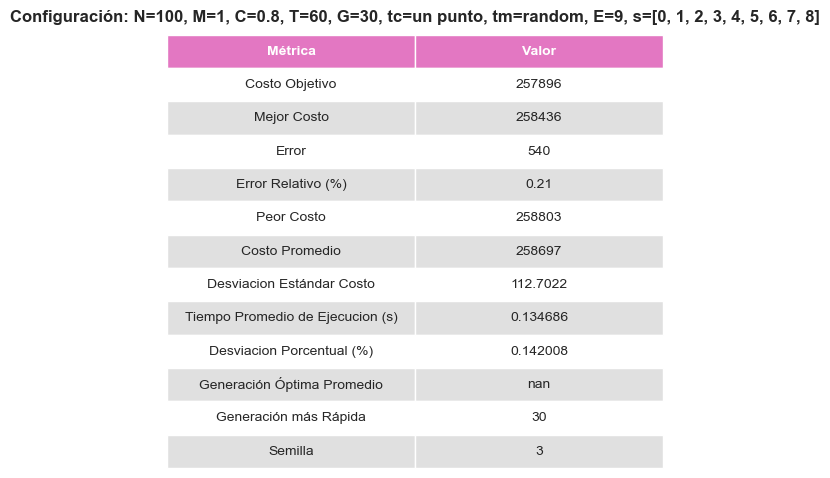

In [21]:
todo("Buscando Torneo")

# **BÚSQUEDA DE TIPO DE CROSSOVER**

In [13]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "uniforme",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258835, Tiempo = 0.10280s, Generación Óptima = None
Seed 1: Mejor Costo = 258905, Tiempo = 0.10056s, Generación Óptima = None
Seed 2: Mejor Costo = 258695, Tiempo = 0.13068s, Generación Óptima = None
Seed 3: Mejor Costo = 258413, Tiempo = 0.11760s, Generación Óptima = None
Seed 4: Mejor Costo = 258681, Tiempo = 0.11556s, Generación Óptima = None
Seed 5: Mejor Costo = 258579, Tiempo = 0.21007s, Generación Óptima = None
Seed 6: Mejor Costo = 258661, Tiempo = 0.11623s, Generación Óptima = None
Seed 7: Mejor Costo = 258633, Tiempo = 0.11975s, Generación Óptima = None
Seed 8: Mejor Costo = 258714, Tiempo = 0.09784s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=uniforme, tm=random ---
Seed 0: Mejor Costo = 259350, Tiempo = 0.11626s, Generación Óptima = None
Seed 1: Mejor Costo = 259203, Tiempo = 0.10062s, Generación Óptima = None
Seed 2: 

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=40, G=30, tc=uniforme, tm=random\mejor-solucion.txt


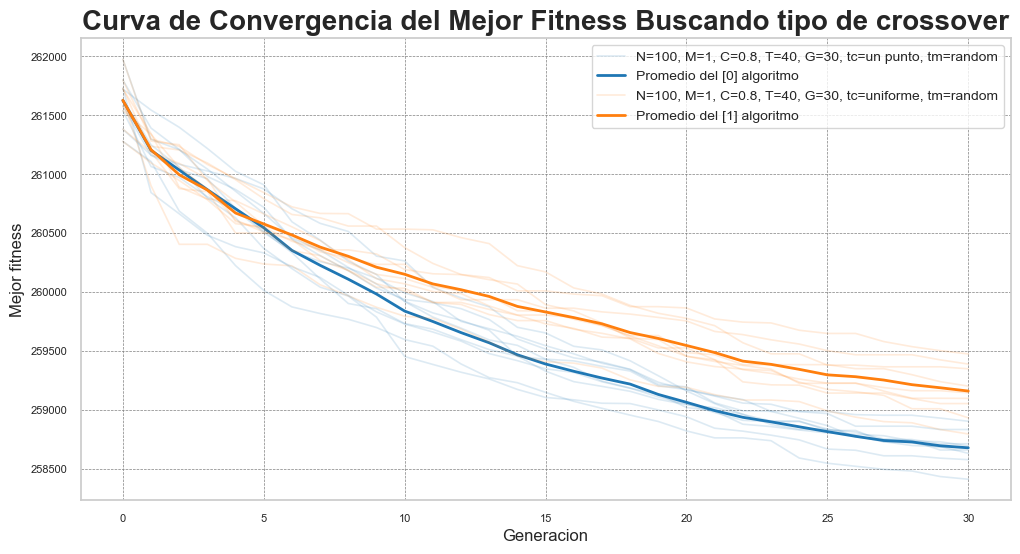

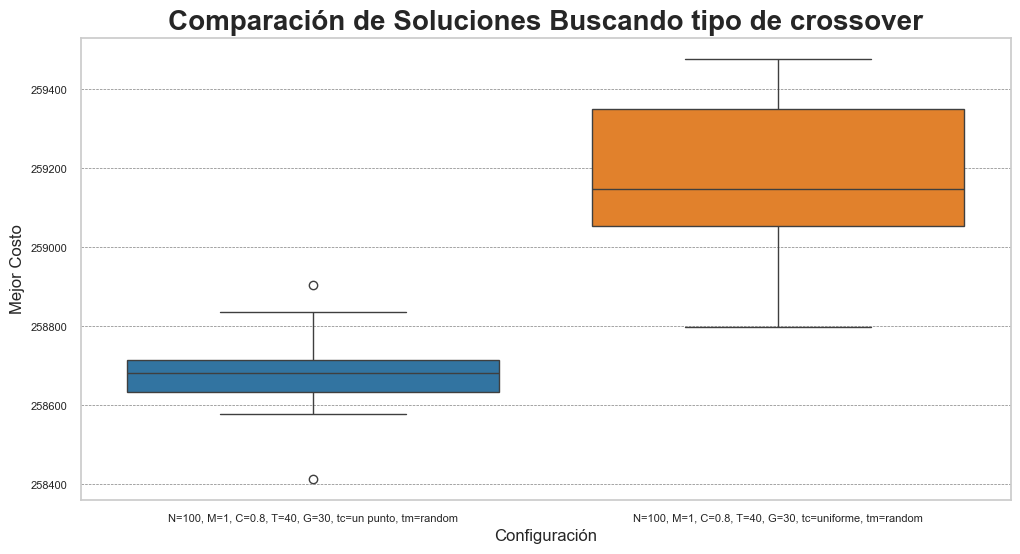

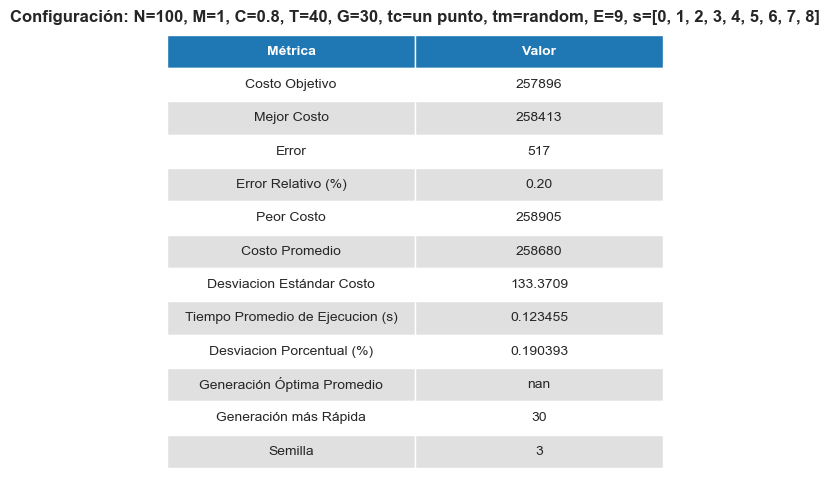

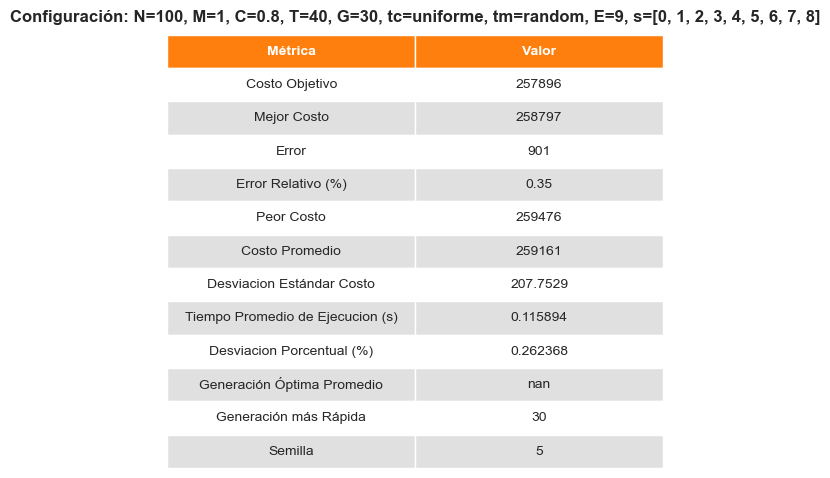

In [16]:
todo("Buscando tipo de crossover")

# **BÚSQUEDA DE TIPO DE MUTACIÓN**

In [15]:
configuraciones = [
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "mejor"
    },
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 30,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    }
]

--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=mejor ---
Seed 0: Mejor Costo = 258362, Tiempo = 0.23759s, Generación Óptima = None
Seed 1: Mejor Costo = 258391, Tiempo = 0.22026s, Generación Óptima = None
Seed 2: Mejor Costo = 258492, Tiempo = 0.24731s, Generación Óptima = None
Seed 3: Mejor Costo = 258146, Tiempo = 0.26724s, Generación Óptima = None
Seed 4: Mejor Costo = 258409, Tiempo = 0.26695s, Generación Óptima = None
Seed 5: Mejor Costo = 258414, Tiempo = 0.27968s, Generación Óptima = None
Seed 6: Mejor Costo = 258283, Tiempo = 0.31045s, Generación Óptima = None
Seed 7: Mejor Costo = 258356, Tiempo = 0.22524s, Generación Óptima = None
Seed 8: Mejor Costo = 258351, Tiempo = 0.28370s, Generación Óptima = None


--- Ejecutando configuracion: N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random ---
Seed 0: Mejor Costo = 258835, Tiempo = 0.08358s, Generación Óptima = None
Seed 1: Mejor Costo = 258905, Tiempo = 0.10113s, Generación Óptima = None
Seed 2: M

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=mejor\mejor-solucion.txt
Texto guardado en resultados\UFLP-10\N=100, M=1, C=0.8, T=40, G=30, tc=un punto, tm=random\mejor-solucion.txt


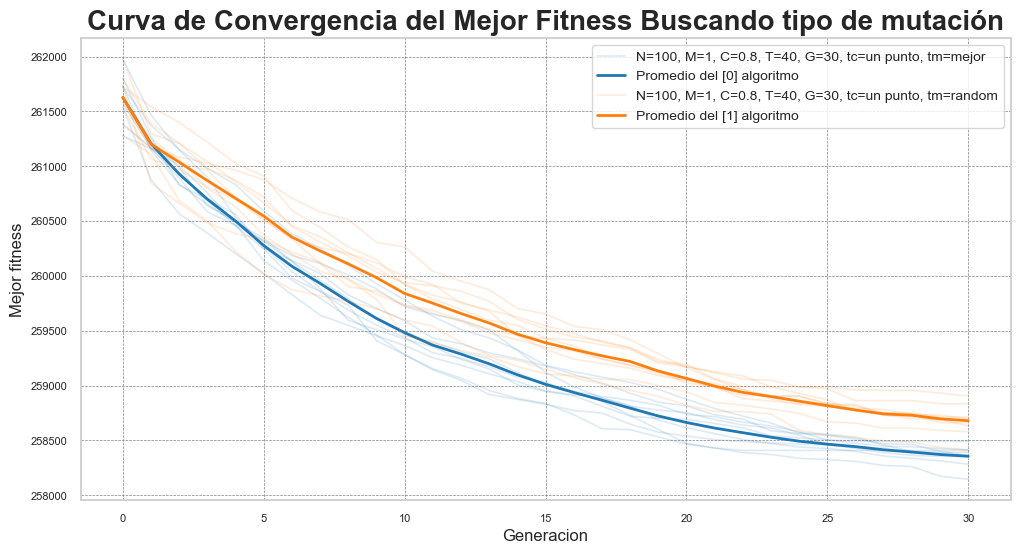

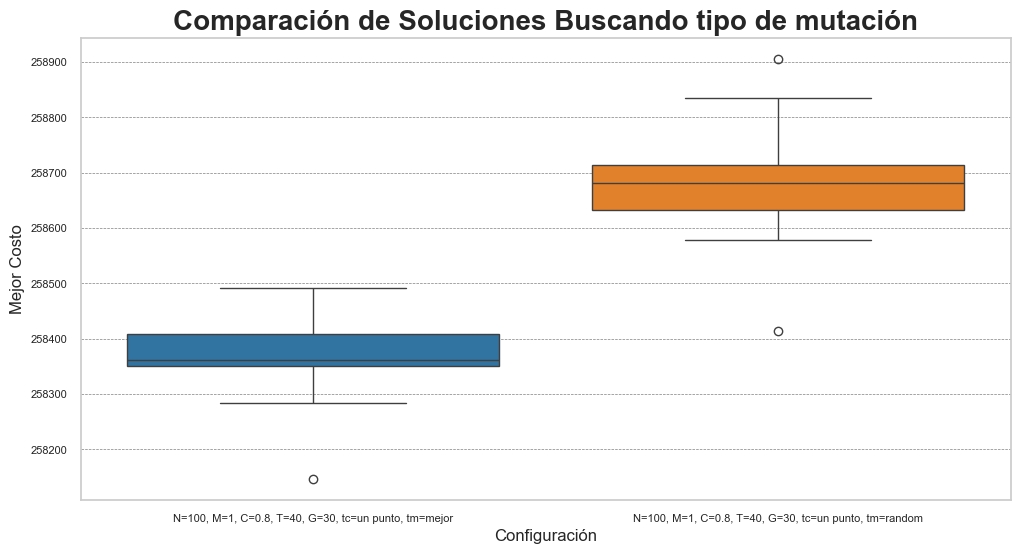

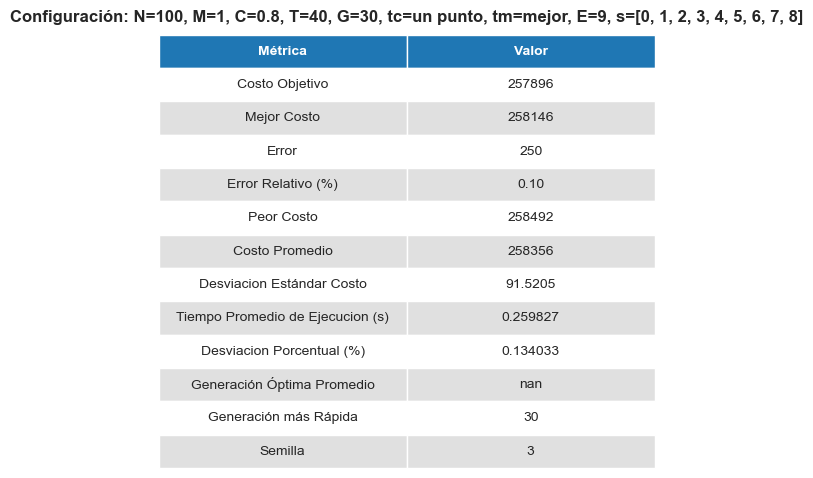

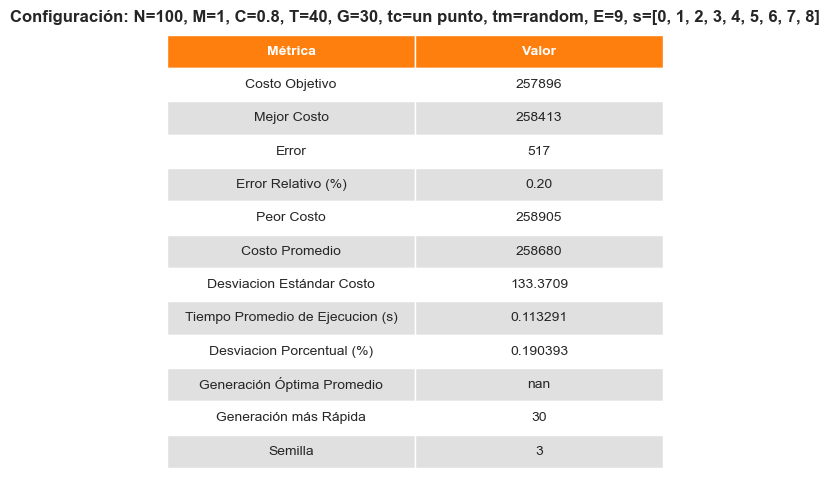

In [16]:
todo("Buscando tipo de mutación")

In [24]:
configuraciones = [
    {
        "tamaño_de_poblacion": 300,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 1000,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "mejor"
    }
]

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=40, G=1000, tc=un punto, tm=mejor ---
Seed 5: Mejor Costo = 258104, Tiempo = 29.93904s, Generación Óptima = None




c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Texto guardado en resultados\UFLP-10\N=300, M=1, C=0.8, T=40, G=1000, tc=un punto, tm=mejor\mejor-solucion.txt


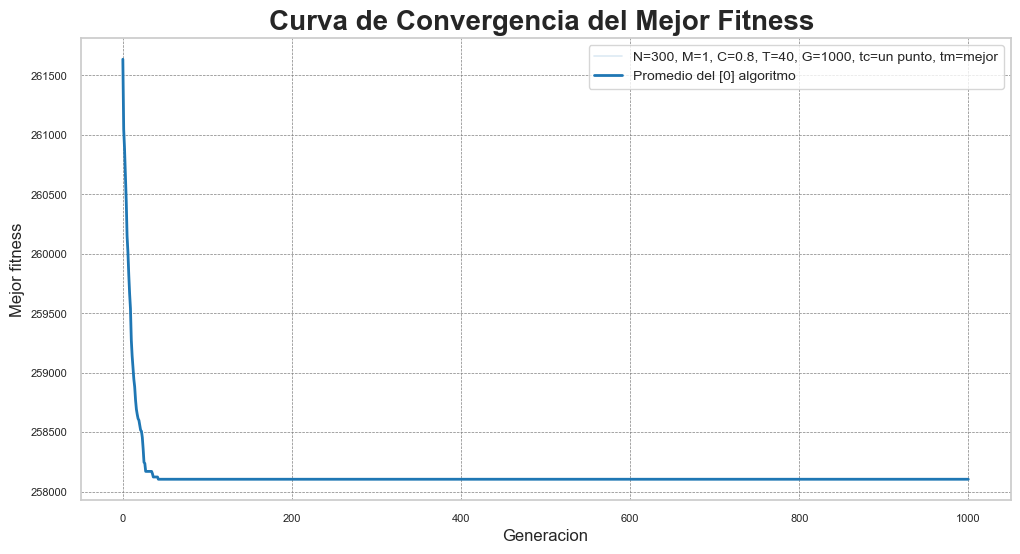

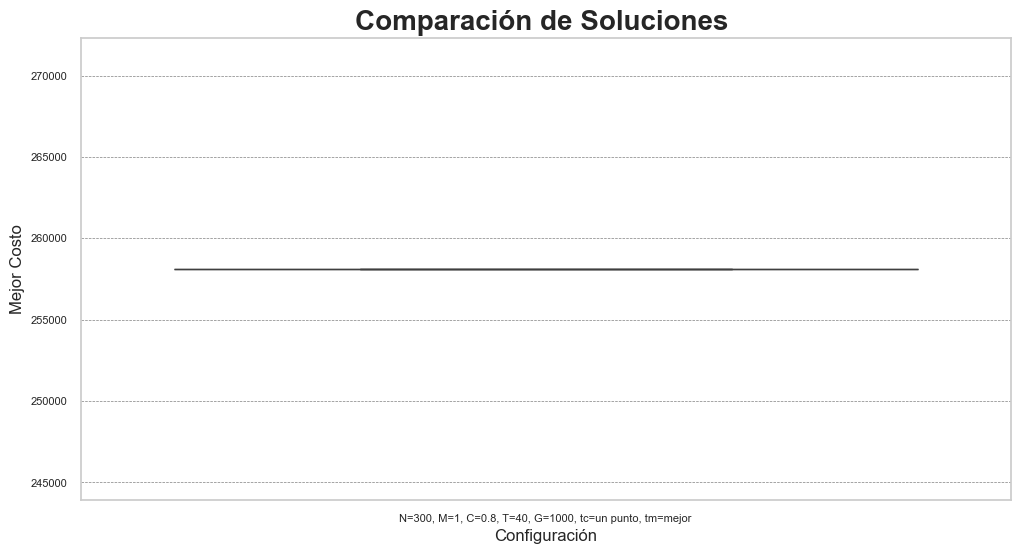

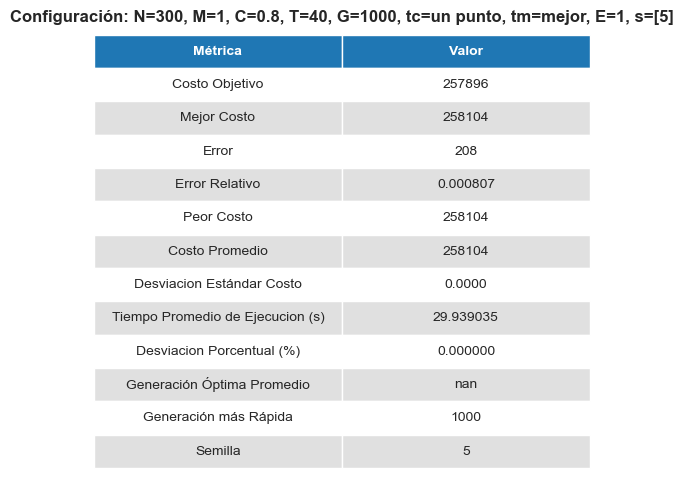

In [25]:
todo("")